<a href="https://colab.research.google.com/github/malinphy/q_17/blob/main/bbc_data_EDA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def data_loader(data_path):

    f = open(data_path)
    data = json.load(f)

    return data

def column_selection(selected_column, data) :
    empty_column = []
    for i in data:
        empty_column.append(i[selected_column])

    return empty_column

def data_cleaner(txt_data):
    # if limit != None:
    clean_data = []
    empty_indices = []
    for i in range(len(txt_data)):
        if txt_data[i] != '':
                # print(content[i])
            clean_data.append(txt_data[i])
        else :
            empty_indices.append(i)
    # print(empty_indices)
    return clean_data , empty_indices        

def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            # list_object.pop(idx)
            del list_object[idx] 


def index_returner(df,unique_region):
    x = df[df['region'] == unique_region].index
    return x       

def char_counter(x):
    return  len(x)

def token_counter(x):
    return len(x.split())          

In [3]:
import os 
import json
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
# import tensorflow as tf 
# from tensorflow import keras 
# from tensorflow.keras import layers
# from tensorflow.keras.layers import *

plt.style.use('ggplot')

In [4]:
input_path = 'drive/MyDrive/bbc_news_list_uk.json'
data = data_loader(input_path)
print(data[0].keys())

dict_keys(['tags', 'title', 'news_post_date', 'raw_content', 'content', 'url', 'author', 'language', '_id', 'region', 'short_description', 'category', 'crawled_at'])


In [5]:
content = column_selection('content', data)
title = column_selection('title', data)
region  = column_selection('region', data)
short_desc = column_selection('short_description', data)
category = column_selection('category', data)

In [6]:
print('content_len:', len(content))
print('title_len:', len(title))
print('region_len:', len(region))
print('desc_len:', len(short_desc))
print('category_len:', len(category))

content_len: 15825
title_len: 15825
region_len: 15825
desc_len: 15825
category_len: 15825


In [7]:
for i in range(len(region)):
    if region[i] == '':
        region[i] = 'NO_INFO'

In [8]:
clean_content,empty_indices_content = data_cleaner(content)

In [9]:
clean_title,empty_indices_title = data_cleaner(title)
clean_region,empty_indices_region = data_cleaner(region)
clean_short_desc,empty_indices_short_desc = data_cleaner(short_desc)
clean_category,empty_indices_category = data_cleaner(category)

In [10]:
# delete_multiple_element(clean_content,empty_indices_content)
delete_multiple_element(clean_title,empty_indices_content)
delete_multiple_element(clean_region,empty_indices_content)
delete_multiple_element(clean_short_desc,empty_indices_content)
delete_multiple_element(clean_category,empty_indices_content)

In [11]:
print('Clean Content Length :',len(clean_content))
print('Clean Title Length :',len(clean_title))
print('Clean Region Length :',len(clean_region))
print('Clean ShortDescription Length :',len(clean_short_desc))
print('Clean Category Length :',len(clean_category))

Clean Content Length : 15468
Clean Title Length : 15468
Clean Region Length : 15468
Clean ShortDescription Length : 15468
Clean Category Length : 15468


In [12]:
df_clean = pd.DataFrame({
    'content': clean_content,
    'title' : clean_title,
    'region' : clean_region,
    'desc' : clean_short_desc,
    'category' : clean_category
})
df_clean.head(1)

,content,title,region,desc,category
0,The heroin substitute methadone can be used as...,Why quitting heroin substitute methadone is 'v...,Health,Heroin substitute methadone is used to wean ad...,BBC News


In [13]:
print('number of unique region :',df_clean['region'].nunique())
# print(df_clean['region'].unique())

number of unique region : 84


In [14]:
new_df = pd.DataFrame(df_clean.groupby(['region'])['region'].count())
new_df = new_df.rename(columns = {'region':'counts'})
new_df = new_df.reset_index()


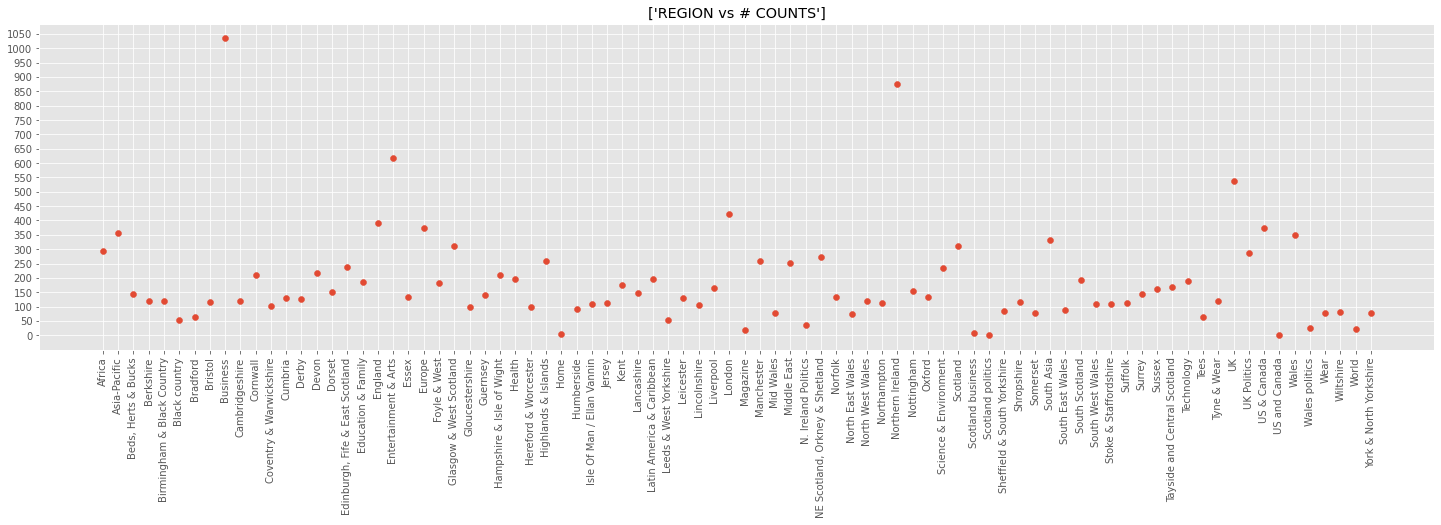

In [15]:
plt.figure(figsize=(25,6))
plt.scatter(new_df['region'], new_df['counts'])
plt.xticks(rotation=90);
plt.yticks(np.arange(0, 1100, 50));
plt.title(['REGION vs # COUNTS']);

In [16]:
# def json_maker(query, id, content, title, region, desc):
#     return {'query':str(query),'ID':id,'CONTENT':content, 'TITLE':title, 'REGION':region, 'DESCRIPTION':desc}
# def info_print(index_num):
    
#     print('CONTENT:', df_clean['content'][index_num])
#     print('TITLE:', df_clean['title'][index_num])
#     print('REGION:', df_clean['region'][index_num])
#     print('DESC:', df_clean['desc'][index_num])

In [17]:
df_clean['content_char_length'] = df_clean['content'].apply(char_counter)
df_clean['content_token_length'] = df_clean['content'].apply(token_counter)

print('MEAN VALUE FOR THE CONTENT CHAR LENGTH :',np.mean(df_clean['content_char_length']))
print('MEDIAN VALUE FOR THE CONTENT CHAR LENGTH :',np.median(df_clean['content_char_length']))

print('MEAN VALUE FOR THE CONTENT TOKEN LENGTH :',np.mean(df_clean['content_token_length']))
print('MEDIAN VALUE FOR THE CONTENT TOKEN LENGTH :',np.median(df_clean['content_token_length']))

MEAN VALUE FOR THE CONTENT CHAR LENGTH : 1754.240302560124
MEDIAN VALUE FOR THE CONTENT CHAR LENGTH : 1404.0
MEAN VALUE FOR THE CONTENT TOKEN LENGTH : 289.42649340574087
MEDIAN VALUE FOR THE CONTENT TOKEN LENGTH : 231.0


In [18]:
df_clean.head(3)

,content,title,region,desc,category,content_char_length,content_token_length
0,The heroin substitute methadone can be used as...,Why quitting heroin substitute methadone is 'v...,Health,Heroin substitute methadone is used to wean ad...,BBC News,5234,907
1,The eldest son of North Korean leader Kim Jong...,North Korea leader's eldest son 'opposes dynasty',Asia-Pacific,The eldest son of North Korean leader Kim Jong...,BBC News,2039,346
2,Seven oil paintings created by notorious gangs...,Paintings by gangster Reggie Kray go on sale i...,Lincolnshire,A series of oil painting produced by gangster ...,BBC News,1486,259


In [19]:
new_df.sort_values(by = ['counts'])

,region,counts
77,US and Canada,1
58,Scotland politics,2
30,Home,5
57,Scotland business,9
42,Magazine,17
...,...,...
41,London,423
74,UK,537
19,Entertainment & Arts,616
52,Northern Ireland,877


## CLUSTERING & DIMENSIONALITY REDUCTION

In [20]:
!pip install bertopic[use] -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 56.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 844.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 110.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 107.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━

In [21]:
!pip install sentence_transformers -q

In [22]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df_clean['content'])

Batches:   0%|          | 0/484 [00:00<?, ?it/s]

2023-02-28 20:53:55,594 - BERTopic - Transformed documents to Embeddings
2023-02-28 20:54:38,631 - BERTopic - Reduced dimensionality
2023-02-28 20:55:12,069 - BERTopic - Clustered reduced embeddings


In [23]:
print(len(set(topics)))
print(len(np.where(np.array(topics) == -1)[0]))

221



In [25]:
import tensorflow_hub
embedding_model = tensorflow_hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
topic_model = BERTopic(embedding_model=embedding_model)
topics, probs = topic_model.fit_transform(df_clean['content'])

Instructions for updating:
Use tf.identity instead.
2023-02-28 21:00:17,628 - BERTopic - Transformed documents to Embeddings
2023-02-28 21:00:33,225 - BERTopic - Reduced dimensionality
2023-02-28 21:00:33,754 - BERTopic - Clustered reduced embeddings


In [30]:
print(len(set(topics)))
print(len(np.where(np.array(topics) == -1)[0]))

221
0


In [40]:
sentence_model = SentenceTransformer('all-mpnet-base-v2', device="cuda")
topic_model = BERTopic(embedding_model=sentence_model, verbose=True)
topics, probs = topic_model.fit_transform(df_clean['content'])
print(len(set(topics)))
print(len(np.where(np.array(topics) == -1)[0]))

Batches:   0%|          | 0/484 [00:00<?, ?it/s]

2023-02-28 21:11:58,306 - BERTopic - Transformed documents to Embeddings
2023-02-28 21:12:14,154 - BERTopic - Reduced dimensionality
2023-02-28 21:12:14,659 - BERTopic - Clustered reduced embeddings


292
4572


In [41]:
sentence_model = SentenceTransformer('all-MiniLM-L6-v2',  device="cuda")
topic_model = BERTopic(embedding_model=sentence_model, verbose=True)
topics, probs = topic_model.fit_transform(df_clean['content'])
print(len(set(topics)))
print(len(np.where(np.array(topics) == -1)[0]))

Batches:   0%|          | 0/484 [00:00<?, ?it/s]

2023-02-28 21:13:56,299 - BERTopic - Transformed documents to Embeddings
2023-02-28 21:14:11,847 - BERTopic - Reduced dimensionality
2023-02-28 21:14:12,375 - BERTopic - Clustered reduced embeddings


240
5095


In [42]:


sentence_model = SentenceTransformer('all-distilroberta-v1',  device="cuda")
topic_model = BERTopic(embedding_model=sentence_model, verbose=True)
topics, probs = topic_model.fit_transform(df_clean['content'])
print(len(set(topics)))
print(len(np.where(np.array(topics) == -1)[0]))

Batches:   0%|          | 0/484 [00:00<?, ?it/s]

2023-02-28 21:17:54,245 - BERTopic - Transformed documents to Embeddings
2023-02-28 21:18:11,215 - BERTopic - Reduced dimensionality
2023-02-28 21:18:12,079 - BERTopic - Clustered reduced embeddings


265
4799


In [43]:
vector_dir = 'drive/MyDrive/BBC_content_vectors.npy'
embedding_vectors = np.load(vector_dir)
print((embedding_vectors).shape)

(15468, 1536)


In [48]:
import umap
import hdbscan

In [49]:
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding_vectors)

cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

In [50]:
print(len(set(cluster.labels_)))
print(len(np.where(np.array(cluster.labels_) == -1)[0]))

161
3459


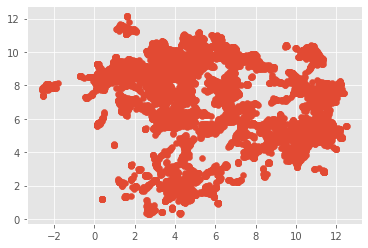

In [51]:
plt.scatter(umap_embeddings[:,0],umap_embeddings[:,1])